# `ANN-Regression`

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore')

In [41]:
# !pip install xgboost

In [42]:
dataset = datasets.load_boston()

In [43]:
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [44]:
print(dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [45]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [46]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
house_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [48]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [50]:
house_df['Price'] = dataset.target

In [51]:
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
house_df.shape

(506, 14)

In [53]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

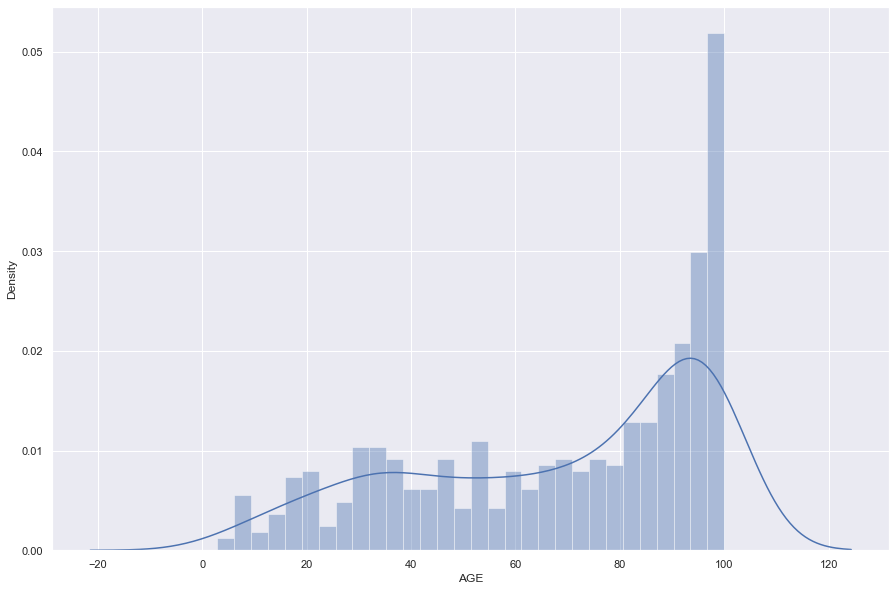

In [54]:
sns.set(rc = {'figure.figsize': (15, 10)})
sns.distplot(house_df['AGE'], bins=30)
plt.show()

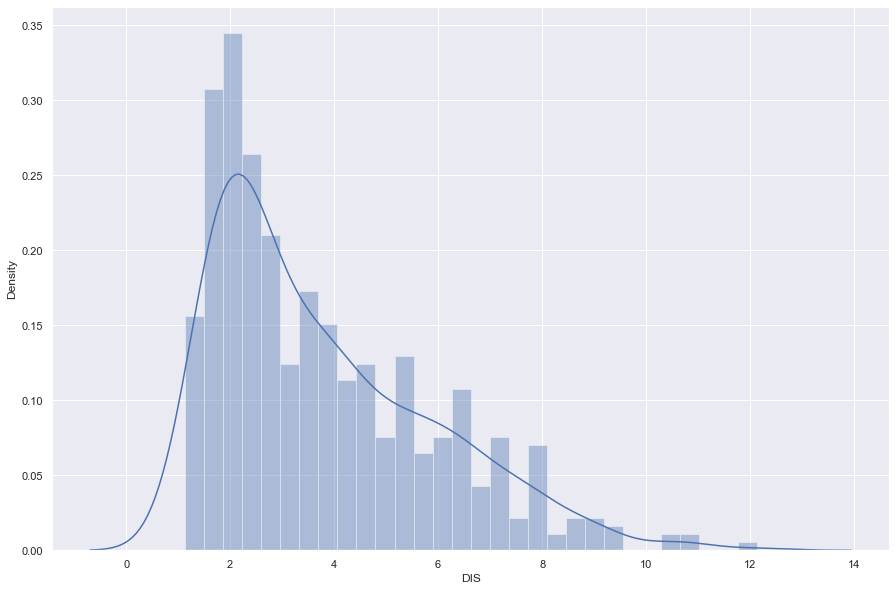

In [55]:
sns.set(rc = {'figure.figsize': (15, 10)})
sns.distplot(house_df['DIS'], bins=30)
plt.show()

<AxesSubplot:>

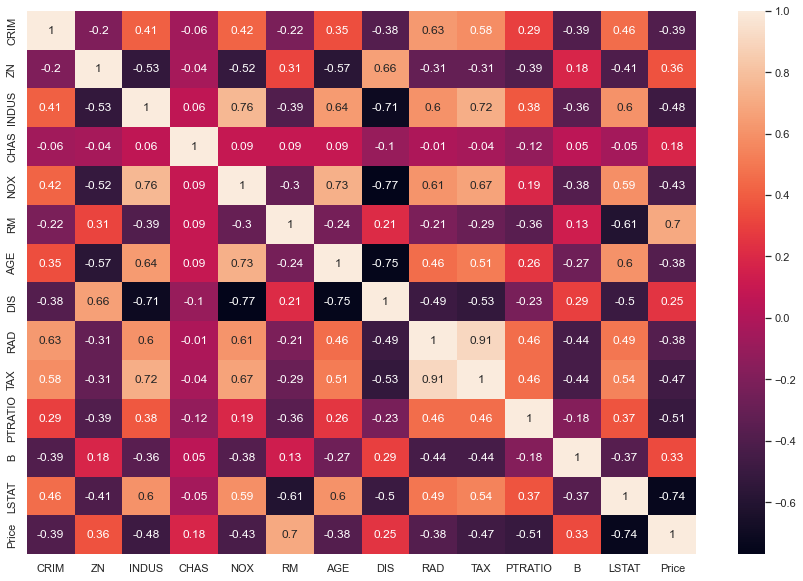

In [56]:
correlation_matrix = house_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot= True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DIS', ylabel='AGE'>

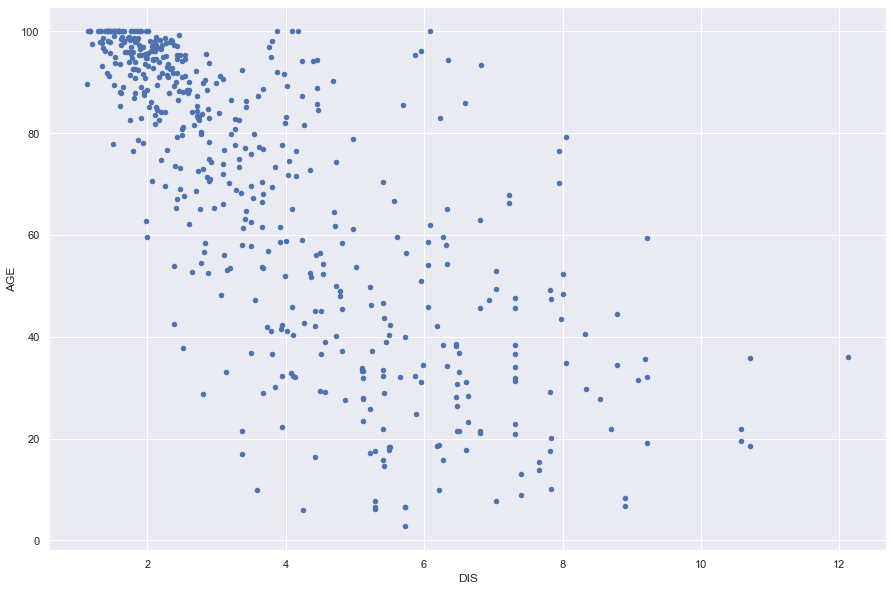

In [57]:
house_df.plot.scatter(x='DIS', y='AGE')

In [58]:
x = dataset.data
y = dataset.target
print(x.shape, y.shape)

(506, 13) (506,)


In [59]:
house_df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state= 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### `Preprocessing of data`

In [61]:
train_x = preprocessing.normalize(X_train)
test_x = preprocessing.normalize(X_test)

In [62]:
train_x[0:5]

array([[1.97719051e-02, 0.00000000e+00, 2.38209381e-02, 0.00000000e+00,
        8.08069392e-04, 6.98045612e-03, 1.28053993e-01, 2.76467650e-03,
        3.15857743e-02, 8.76505236e-01, 2.65846934e-02, 4.59941516e-01,
        3.27834016e-02],
       [1.24337732e-03, 0.00000000e+00, 1.61320572e-02, 0.00000000e+00,
        1.06622197e-03, 1.15619683e-02, 1.11973125e-01, 8.91543891e-03,
        7.92730086e-03, 6.08420341e-01, 4.16183295e-02, 7.84049691e-01,
        1.67860596e-02],
       [7.29281484e-05, 7.36435428e-02, 1.27508534e-02, 0.00000000e+00,
        9.21385926e-04, 1.26898345e-02, 4.90255585e-02, 1.39727050e-02,
        2.10410122e-03, 6.39646772e-01, 3.55593107e-02, 7.62210668e-01,
        1.64751126e-02],
       [1.04781794e-02, 0.00000000e+00, 2.68998226e-02, 0.00000000e+00,
        9.12513318e-04, 9.07014459e-03, 1.26473751e-01, 3.00475477e-03,
        3.56682730e-02, 9.89794576e-01, 3.00207965e-02, 3.74516867e-03,
        3.46130866e-02],
       [1.44405380e-03, 0.00000000e+

In [63]:
model = XGBRegressor()
model.fit(train_x, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### `Do not include any activation function in last phase, it's regression`

In [64]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(64, activation='relu'))
# network.add(layers.Dropout(0.5)) ## will lead to over fitting
### too much dropout can lead to overfitting
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [65]:
network.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse', metrics=['mae'])

In [66]:
print(network.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
history = network.fit(train_x, Y_train, epochs= 100, validation_data = (test_x, Y_test), batch_size= 1)

Epoch 1/100
404/404 [==============================] - 2s 3ms/step - loss: 104.3464 - mae: 7.0856 - val_loss: 55.5931 - val_mae: 6.2026
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 74.7207 - mae: 6.2992 - val_loss: 40.8683 - val_mae: 3.9778
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 73.9452 - mae: 6.3177 - val_loss: 34.7573 - val_mae: 3.7819
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 69.3108 - mae: 5.9215 - val_loss: 35.3210 - val_mae: 4.1927
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 61.9862 - mae: 5.6254 - val_loss: 32.8217 - val_mae: 3.5015
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 54.4822 - mae: 5.3887 - val_loss: 45.6951 - val_mae: 4.3965
Epoch 7/100
404/404 [==============================] - 1s 3ms/step - loss: 51.0658 - mae: 5.0237 - val_loss: 26.9116 - val_mae: 3.2827
Epoch 8/100
404/404 [==============================] -

404/404 [==============================] - 1s 2ms/step - loss: 35.4779 - mae: 4.2718 - val_loss: 20.5747 - val_mae: 3.2665
Epoch 62/100
404/404 [==============================] - 1s 2ms/step - loss: 28.1050 - mae: 3.9441 - val_loss: 18.1421 - val_mae: 2.8855
Epoch 63/100
404/404 [==============================] - 1s 3ms/step - loss: 33.1753 - mae: 3.9839 - val_loss: 25.5949 - val_mae: 3.3881
Epoch 64/100
404/404 [==============================] - 1s 3ms/step - loss: 35.6303 - mae: 4.2873 - val_loss: 23.9764 - val_mae: 3.6146
Epoch 65/100
404/404 [==============================] - 1s 3ms/step - loss: 33.3482 - mae: 4.0493 - val_loss: 27.5444 - val_mae: 4.3127
Epoch 66/100
404/404 [==============================] - 1s 2ms/step - loss: 39.0173 - mae: 4.3306 - val_loss: 37.7267 - val_mae: 5.2141
Epoch 67/100
404/404 [==============================] - 1s 2ms/step - loss: 35.6163 - mae: 4.1968 - val_loss: 23.6217 - val_mae: 3.6879
Epoch 68/100
404/404 [==============================] - 1s 2m

In [68]:
pred_y = model.predict(np.reshape(test_x[0], (-1, 13)))

In [69]:
pred_y

array([23.475895], dtype=float32)

In [70]:
print(y[0])

24.0


In [71]:
vals = []
for i in range(0, Y_train.__len__()):
  val= model.predict(np.reshape(train_x[i], (-1, 13)))
  vals.append(val[0])

In [72]:
print(vals.__len__())

404


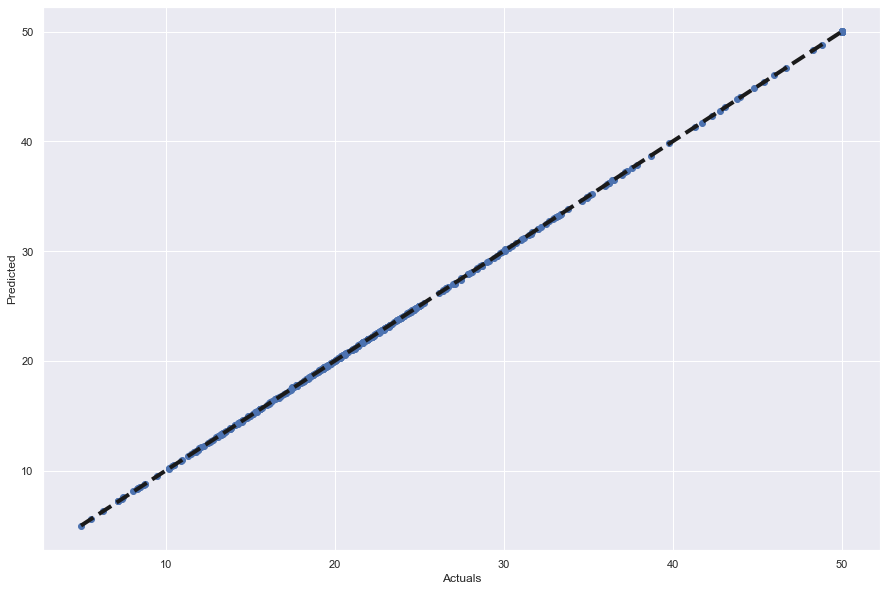

In [73]:
fig, ax = plt.subplots()
ax.scatter(Y_train, vals)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

# `END -----------------------------------------`